In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from text_processor import TextProcessor

%matplotlib inline

### Preparing all necessary stuff for processing and wordcloud creation

In [2]:
# we are loading the reviews data from file created using scrape_reviews.py
data = pd.read_csv("data/reviews.csv")
data.dropna(subset=["review_text"], inplace=True) # some reviews may miss the body and have only title

# load image to create mask for wordclouds of good and bad reviews
mask_good = np.array(Image.open("png_mask/thumbs_up.png"))
mask_bad = np.flipud(mask_good)

# extend set of STOPWORDS by some specific ones which appear in most of the reviews because
# of the nature of the company product and should not be informative of any possible problems
stopwords_extended = STOPWORDS.union(
    {"kiwi", "kiwi.com", "booking", "book", "airline", "company", "flight",
     "'ve", "n't", "'s", "'m", "'re", "fly", "trip", "travel", "airport",  "ticket"}
)

### Compute word frequencies

In [3]:
%%time

text_processor = TextProcessor(stopwords=stopwords_extended)

data["processed_review_text"] = data["review_text"].map(text_processor.tokenize_and_normalize)

reviews_bad = data.loc[data["stars_given"].str.contains("1|2|3"), "processed_review_text"]
reviews_good = data.loc[data["stars_given"].str.contains("4|5"), "processed_review_text"]

word_frequencies_bad = text_processor.get_word_frequencies(reviews_bad.values.tolist())
word_frequencies_good = text_processor.get_word_frequencies(reviews_good.values.tolist())

CPU times: user 28.5 s, sys: 408 ms, total: 29 s
Wall time: 29.1 s


### Plot wordclouds

In [4]:
# create WordCloud objects
common_kwargs = {
    "width": 1000,
    "height": 1000,
    "max_words": 100,
    "min_font_size": 8,
    "background_color": "#2e3330",
    "random_state": 42, # ensure reproducible results
}

wordcloud_bad = WordCloud(
    colormap="autumn",
    mask=mask_bad,
    **common_kwargs
).generate_from_frequencies(word_frequencies_bad)

wordcloud_good = WordCloud(
    colormap="summer",
    mask=mask_good,
    **common_kwargs
).generate_from_frequencies(word_frequencies_good)

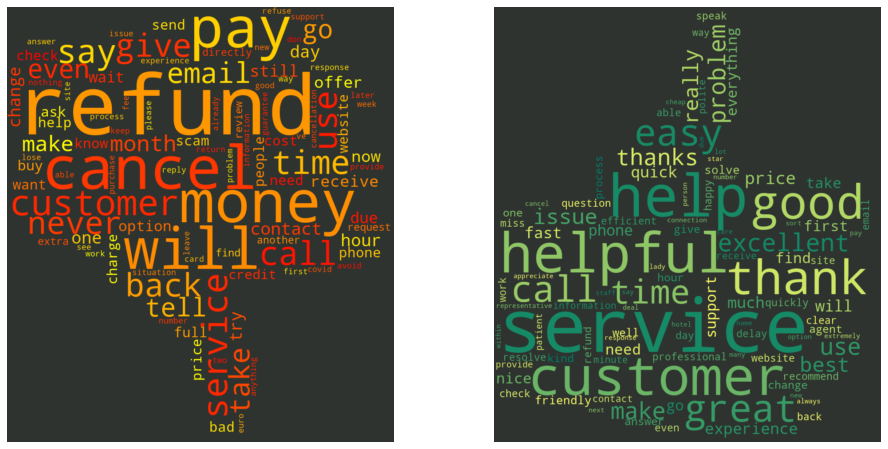

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(wordcloud_bad, interpolation='bilinear')
axes[0].axis("off")
axes[1].imshow(wordcloud_good, interpolation='bilinear')
axes[1].axis("off")
plt.show()